# Part 2 Preprocessing and Feature Engineering

#### Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

#### Modeling
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

In [ ]:
#=========================================================================
#
#  NOTE: I SEPARATED MY REGRESSION TESTING. LINEAR IS ON THIS FILE
#            lASSO AND RIDGE ARE BOTH TOGETHER IN A SEPARATE FILE
#             I DO MY KAGGLE SUBMISSION ALSO ON THIS FILE
#=========================================================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
train_df = pd.read_csv('../datasets/train_v2.csv')
test_df = pd.read_csv('../datasets/test_v2.csv')

In [3]:
train_df.set_index('id', inplace= True)
test_df.set_index('id', inplace= True)

In [4]:
train_df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
544,531379050,60,RL,43.0,11492,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,3,2010,WD,138500
138,535126040,20,RL,137.0,16492,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,6,2010,WD,190000


In [5]:
train_df.sort_values(by='saleprice')

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
182,902207130,30,RM,68.0,9656,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,6,2010,WD,12789
1554,910251050,20,A (agr),80.0,14584,Pave,NoAccess,Reg,Low,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,2,2008,WD,13100
727,902477120,30,C (all),60.0,7879,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,GdWo,No_Misc,0,11,2009,WD,34900
2844,909101330,30,RL,60.0,8088,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,2,2006,ConLD,35000
2881,911175430,20,C (all),50.0,9000,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,No_Misc,0,10,2006,WD,35311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,528118090,60,RL,96.0,12539,Pave,NoAccess,Reg,Lvl,AllPub,...,192,0,NoPool,NoFence,No_Misc,0,6,2008,WD,460000
514,528441090,20,RL,85.0,11128,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,NoPool,GdPrv,No_Misc,0,10,2009,WD,468000
2667,902400110,75,RM,90.0,22950,Pave,NoAccess,IR2,Lvl,AllPub,...,410,0,NoPool,GdPrv,No_Misc,0,6,2006,WD,475000


In [6]:
test_df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,4,2006,WD
2718,905108090,90,RL,69.545961,9662,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,8,2006,WD
2414,528218130,60,RL,58.000000,17104,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,9,2006,New
1989,902207150,30,RM,60.000000,8520,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,0,NoPool,NoFence,No_Misc,0,7,2007,WD
625,535105100,20,RL,69.545961,9500,Pave,NoAccess,IR1,Lvl,AllPub,...,0,185,0,NoPool,NoFence,No_Misc,0,7,2009,WD


In [7]:
train_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 544 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              1677 non-null   int64  
 1   ms_subclass      1677 non-null   int64  
 2   ms_zoning        1677 non-null   object 
 3   lot_frontage     1677 non-null   float64
 4   lot_area         1677 non-null   int64  
 5   street           1677 non-null   object 
 6   alley            1677 non-null   object 
 7   lot_shape        1677 non-null   object 
 8   land_contour     1677 non-null   object 
 9   utilities        1677 non-null   object 
 10  lot_config       1677 non-null   object 
 11  land_slope       1677 non-null   object 
 12  neighborhood     1677 non-null   object 
 13  condition_1      1677 non-null   object 
 14  condition_2      1677 non-null   object 
 15  bldg_type        1677 non-null   object 
 16  house_style      1677 non-null   object 
 17  overall_qual  

In [8]:
train_df.select_dtypes(include='object').columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type'],
      dtype='object')

In [9]:
# Things I want to dummify and think will help my model:
#     ms_zoning, lot_shape, utilities, 

## 2.1 Feature Engineering 

In [10]:
train_df.shape, test_df.shape

((1677, 80), (878, 79))

In [11]:
train_df['neighborhood'].unique().shape

(26,)

In [12]:
test_df['neighborhood'].unique().shape

(26,)

In [13]:
# one hot encode the values of the neighborhood column -------------------------------------------------------
train_dummies_neighborhood = pd.get_dummies(train_df['neighborhood'])
test_dummies_neighborhood = pd.get_dummies(test_df['neighborhood'])

#make sure to see they have the same number of columns
print(train_dummies_neighborhood.shape)
print(test_dummies_neighborhood.shape)

(1677, 26)
(878, 26)


In [14]:
#one hot encode the values of the mz_zoning column +++++++++++++++++++++++++++++++++
train_dummies_ms_zoning = pd.get_dummies(train_df['ms_zoning'])
test_dummies_ms_zoning = pd.get_dummies(test_df['ms_zoning'])

#same shape? check
print(train_dummies_ms_zoning.shape)
print(test_dummies_ms_zoning.shape)

#make list of columns missing from train and test (just to check both)
missing_columns_train = list(set(test_dummies_ms_zoning) - set(train_dummies_ms_zoning)  )
missing_columns_test = list(set(train_dummies_ms_zoning) - set(test_dummies_ms_zoning) )

print(f'Columns missing from Train: {missing_columns_train}')
print(f'Columns missing from Test: {missing_columns_test}')

(1677, 7)
(878, 6)
Columns missing from Train: []
Columns missing from Test: ['A (agr)']


In [15]:
# Add missing columns to test, filling all rows with 0 (since thos values dont show up in test)++++++++
for col in missing_columns_test:
    test_dummies_ms_zoning[col] = 0

#check that both train and test dummies of ms_zoning have the same columns now
missing_columns_test = list(set(train_dummies_ms_zoning) - set(test_dummies_ms_zoning) )
missing_columns_test
    

[]

In [16]:
train_dummies_ms_zoning.head(1)  #++++++++++++++++++++++++++++++++

,A (agr),C (all),FV,I (all),RH,RL,RM
id,,,,,,,
544,0,0,0,0,0,1,0


In [17]:
test_dummies_ms_zoning.head(1)  #++++++++++++++++++++++++

,C (all),FV,I (all),RH,RL,RM,A (agr)
id,,,,,,,
2658,0,0,0,0,0,1,0


In [18]:
train_dummies_neighborhood.head(2)

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
id,,,,,,,,,,,,,,,,,,,,,
544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_dummies_neighborhood.head(2)

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
id,,,,,,,,,,,,,,,,,,,,,
2658,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
set(train_dummies_neighborhood) - set(test_dummies_neighborhood)  #they have the same columns!!----------------------------

set()

In [21]:
train_dummies_neighborhood.columns

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV',
       'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object')

In [22]:
test_dummies_neighborhood.columns

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV',
       'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object')

In [23]:
#Drop one of the neigborhood columns from both train and test ---------------------------------------------
train_dummies_neighborhood.drop(columns= 'Blmngtn', inplace= True)
test_dummies_neighborhood.drop(columns= 'Blmngtn', inplace= True)

In [24]:
#join the train and test dummy columns back with the original dataframes -------------------------1st dummy set!!! added into train_df_final-------------------
train_df_final = train_df.join(train_dummies_neighborhood)
test_df_final = test_df.join(test_dummies_neighborhood)

In [25]:
# dropping one of the ms_zoning columns ++++++++++++++++++++++++++
train_dummies_ms_zoning.columns;    # lets drop 'RM'

train_dummies_ms_zoning.drop(columns='RM', inplace=True)
test_dummies_ms_zoning.drop(columns='RM', inplace=True)


In [26]:
#join the mz_zoning dummies back into your final df! ++++++++++++++++++++++++++++++
train_df_final = train_df_final.join(train_dummies_ms_zoning)
test_df_final = test_df_final.join(test_dummies_ms_zoning)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
# ---------------Keep track of what we dummify then drop that column------------------------------ #
train_df_final.drop(columns=['neighborhood'], inplace=True)
test_df_final.drop(columns=['neighborhood'], inplace=True)

In [28]:
train_df_final.drop(columns=['ms_zoning'], inplace=True)
test_df_final.drop(columns=['ms_zoning'], inplace=True)

In [29]:
#Make sure the columns the final train and test dataframes are in the same order   !!!! IMPORTANT COLUMNS ARE IN ORDER!!!

#one method is bracket notation:
test_df_final = test_df_final[train_df_final.drop(columns='saleprice').columns]

#another method is using reindex method:
#test_df_final = test_df_final.reindex(columns = train_df_final.drop(columns='saleprice').columns)



#check that all the columns are now in the same order
(train_df_final.drop(columns = 'saleprice').columns == test_df_final.columns).all()
#---------------------------------------------------------------------------------------

True

In [30]:
# check the shape of both of our final dataframes
print(train_df_final.shape)
print(test_df_final.shape)

(1677, 109)
(878, 108)


#### INTERACTION TERMS

In [31]:
# BASED on my results from graphing the coef down below:
# I will create interaction terms from the low coef!
## -------------------------  screen_porch * wood_deck_sf         and    fireplaces * totrms_abvgrd -------------------
## whatever interaction terms i make for my train set goes onto my test set also!

In [32]:
train_df_final['screen_porch*wood_deck_sf'] = train_df_final['screen_porch'] * train_df_final['wood_deck_sf']
test_df_final['screen_porch*wood_deck_sf'] = test_df_final['screen_porch'] * test_df_final['wood_deck_sf']


train_df_final['fireplaces*totrms_abvgrd'] = train_df_final['fireplaces'] * train_df_final['totrms_abvgrd']
test_df_final['fireplaces*totrms_abvgrd'] = test_df_final['fireplaces'] * test_df_final['totrms_abvgrd']

#remember to do the column order check above  and shape^^

## 2.2 Preprocessing, Tuning, and Modeling

In [33]:
train_df_final.drop(columns='pid',inplace = True)  #Dont need pid.. not going to do math on an ID

In [34]:
#train_df_final.drop(columns='pid',inplace = True)  #Dont need pid.. not going to do math on an ID

In [35]:
train_df_final.columns.to_list(); #Instead of typing out columns one by one.. just call this and set my feature variable(s) to this which is a list of my column names!

In [36]:
train_df_final.select_dtypes(include='object').columns

Index(['street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_type', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type'],
      dtype='object')

In [37]:
#going to try adding all the non object types columns into my feature!
#grab the columns that are NOT object type and drop saleprice.. call those cloumns and put them into a list after


#train_df_final.select_dtypes(exclude='object').drop(columns='saleprice').columns.to_list()  

#------------------------------------------------------------------------------------------------------------------
# the above line was before when i made all my features that were non-object type and dummified neighborhood column  and then did Lr on it 
# and then log transform it to get my kaggle score of 16k
#my idea was the more the variables a model has to train, the better the results.. which looks like it came true!
#------------------------------------------------------------------------------------------------------------------

In [38]:
train_df_final.select_dtypes(exclude='object').columns

Index(['ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'central_air', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd',
       'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold',
       'saleprice', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV',
       'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker', 'A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL',
       

In [39]:
train_df_final.head(1)

,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,...,Timber,Veenker,A (agr),C (all),FV,I (all),RH,RL,screen_porch*wood_deck_sf,fireplaces*totrms_abvgrd
id,,,,,,,,,,,,,,,,,,,,,
544,60,43.0,11492,Pave,NoAccess,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,0,1,0,8


In [40]:
# THE FEATURES WE WILL TAKE OUT BASED ON OUR OLS MODEL:

# train_df[['lot_frontage', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'central_air',
#          'low_qual_fin_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
#          'garage_cars', 'open_porch_sf','enclosed_porch','3ssn_porch', 'misc_val', 'mo_sold']]
# I will create features without these ^.......... features_2


In [41]:
features_2 = train_df_final.select_dtypes(exclude='object').drop(columns=['saleprice', 'lot_frontage', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'central_air',
          'low_qual_fin_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'half_bath',
      'open_porch_sf','enclosed_porch','3ssn_porch', 'misc_val', 'mo_sold' ]).columns.to_list()
len(features_2) #to make my R2 scores slighltly better.. chuck recommended adding 1 or 2 features.. ill add garage_cars and full_bath

57

In [42]:
#Define 'features' list of features to include in your model
# features = ['overall_qual','lot_area', 'gr_liv_area', 'totrms_abvgrd', 'garage_area', 'overall_qual', 'bsmtfin_sf_1', 'bsmt_unf_sf']
# features.extend(train_dummies_neighborhood.columns)

#or:

In [43]:
#Lets define all our features with int,float dtype:

features = train_df_final.select_dtypes(exclude='object').drop(columns='saleprice').columns.to_list() #this is what gave me the best kaggle score! 
                                                                                                #(without interactive terms and only dummified neighborhoods)
        # THOUGHT PROCESS: The more features their are to work with, the better our model will do! 


In [44]:
len(features)   #we have 62 independent varaibles (25 of those are dummy variables from neighborhood)

70

In [45]:
train_df_final.shape, test_df_final.shape

((1677, 110), (878, 110))

In [46]:
#GOING to take my edited dataframe here to do LASSO RIDGE on a separate file====================
train_df_final.to_csv('../datasets/lasso_ridge_train.csv')
test_df_final.to_csv('../datasets/lasso_ridge_test.csv')

#====================================

In [47]:
#Define X and y
X = train_df_final[features_2]      #our training data 
y = train_df_final['saleprice']   #what we want to predict

In [48]:
X.shape

(1677, 57)

In [49]:
X.columns

Index(['ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'full_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'screen_porch',
       'pool_area', 'yr_sold', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber', 'Veenker', 'A (agr)', 'C (all)', 'FV', 'I (all)',
       'RH', 'RL', 'screen_porch*wood_deck_sf', 'fireplaces*totrms_abvgrd'],
      dtype='object')

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 544 to 10
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ms_subclass                1677 non-null   int64  
 1   lot_area                   1677 non-null   int64  
 2   overall_qual               1677 non-null   int64  
 3   overall_cond               1677 non-null   int64  
 4   year_built                 1677 non-null   int64  
 5   year_remod/add             1677 non-null   int64  
 6   mas_vnr_area               1677 non-null   float64
 7   bsmtfin_sf_1               1677 non-null   float64
 8   total_bsmt_sf              1677 non-null   float64
 9   1st_flr_sf                 1677 non-null   int64  
 10  2nd_flr_sf                 1677 non-null   int64  
 11  gr_liv_area                1677 non-null   int64  
 12  full_bath                  1677 non-null   int64  
 13  bedroom_abvgr              1677 non-null   int64

In [51]:
#X.loc[:, ['ms_subclass', 'lot_area'] ];

### Baseline Score using cross_val_score

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
#Instantiate our model
lr = LinearRegression()

In [54]:
print(cross_val_score(lr, X, y))    #Rmember the split is default 5 (cv=5)
print(cross_val_score(lr, X, y).mean()) 
#so our trained model cant fit onto  90% of our observed model,, which is good!

[0.90514539 0.90948822 0.90304987 0.90844079 0.90380255]
0.905985362692806


In [55]:
# baseline score all non object columns + (dummified neigborhood and ms_zoning):.905701

In [56]:
# baseline score all non-object columns +  my two interaction terms + (dummified neigborhood and ms_zoning): .906661 (slightly better)

### PolynomialFeatures (Interaction Terms for everything!)  **skip this**

In [57]:
# DO NOT REALLY NEED TO DO THIS... WAY TOO MUCH COMPLEXITY!

In [58]:
#With our features that we are using lets have them interact with one another and see if it affects are baseline score! 

In [59]:
#Instantiate Polynomial Features
poly = PolynomialFeatures(degree= 2, include_bias=False)

In [60]:
#Create X_poly
#poly.fit(X[])     #i could subset certain columns and to make interaction terms and then add it back to my train_df
#X_poly = poly.transform(X)  #we created our variations of interactions

In [61]:
# X_poly.shape  #whoah thats a lot of variations

In [62]:
# #View it in a dataframe:
# pd.DataFrame(data = X_poly, columns= poly.get_feature_names(features_2)).shape

In [63]:
#poly.get_feature_names(X.columns)  ##hmm maybe too many features!!

Evaluate after PolynomialFeatures:

In [64]:
# lr= LinearRegression()

# print(cross_val_score(lr, X_poly, y))
# print(cross_val_score(lr, X_poly, y).mean())     #get some funky numbers... do not know how to interpret this!.. I am guessing because way to many features of interaction terms! (1700+)
#                                                                                                                                  # look into the The curse of dimensionality (from office hours)
                                        # lets just do some simple interaction terms!!   Made it above section under 'Interaction Term'
        #

### Scaling

In [65]:
# We should scale this data before modeling because of features that work differently on scales.. i.e like square footage or number of bedrooms.. 
                                                # square footage is in the thousands and number of bedrooms is in the single digits

In [66]:
#Instantiate StandardScalar
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [67]:
print('Means:', sc.mean_)
print("Standard Deviation: ", sc.scale_) #for every feature in my dataset 
#for every 1 std dev increase in overall qual , the prices increases by hte amount of the coef (at my graph)

#here! for example.. for 1.109  increase in overall qual, the price would increase by (w/e value the coef is)

Means: [5.77519380e+01 9.26088611e+03 6.07215265e+00 5.57185450e+00
 1.97034526e+03 1.98394335e+03 9.18556947e+01 4.10502683e+02
 1.03971497e+03 1.13699523e+03 3.22875969e+02 1.46587835e+03
 1.55694693e+00 2.82945736e+00 1.04472272e+00 6.37507454e+00
 5.42039356e-01 1.85294275e+03 1.73225999e+00 4.61827072e+02
 8.78795468e+01 1.60459153e+01 1.87179487e+00 2.00778533e+03
 3.57781753e-03 1.13297555e-02 4.11449016e-02 5.96302922e-03
 9.12343470e-02 3.27966607e-02 7.45378652e-02 4.47227191e-02
 1.78890877e-03 3.75670841e-02 1.25223614e-02 3.75670841e-02
 1.57423971e-01 9.54084675e-03 3.45855695e-02 2.02742993e-02
 6.61896243e-02 9.30232558e-02 1.84853906e-02 4.23375075e-02
 4.41264162e-02 6.44007156e-02 1.66964818e-02 2.14669052e-02
 7.15563506e-03 5.96302922e-04 1.13297555e-02 4.88968396e-02
 5.96302922e-04 6.55933214e-03 7.60286225e-01 8.47853309e+02
 3.71973763e+00]
Standard Deviation:  [4.37223364e+01 3.55500752e+03 1.42058080e+00 1.10902180e+00
 3.14832597e+01 2.15062723e+01 1.6510940

In [68]:
X_scaled = sc.transform(X)   #X_scaled outputs and arrays of arays

In [69]:
coef_df2_t = pd.DataFrame({
    'Scaled': sc.scale_
}, index= X.columns
)  
coef_df2_t[:5]
# in scaled terms!  1.42 std of overall_qual is equal to
# for 1.42 increase in overall_qual the price of the home increases by (look at the number of the coef of the scaled or normlaized data!)

,Scaled
ms_subclass,43.722336
lot_area,3555.007516
overall_qual,1.420581
overall_cond,1.109022
year_built,31.483260


In [70]:
#lot_area: 4442.865  (all non object columns + (dummified neigborhood and ms_zoning)

### Linear Regression (Scaled)

In [71]:
#Train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, random_state=42, train_size=.8)

In [72]:
#take a look at the shapes of X_train and X_test
X_train2.shape, X_test2.shape

((1341, 57), (336, 57))

In [73]:
## Establish a baseline model for comparison... whats our baseline RMSE.. when we are training our model we can see that are model is doing better then our baseline model!!!!
## We can think of our baseline model as a naive model that always predicts the mean of our target
y_test_baseline2 = [y_train2.mean()] * len(y_test2)  #the value we are predicting is the avg of our y_train


mean_squared_error(y_test2, y_test_baseline2) ** 0.5

#on avg how far off is your predicted value of a home from the actual value of the home!
# 

73214.31755488492

**On average, our SCALED baseline model prediction is off by 73k dollars for home sale prices.**

In [74]:
#updated by removing few of the outliers from lot_area: 73k
# all non object columns + (dummified neigborhood and ms_zoning) MSE: 75,341.142556
#all non object columns + (dummified neigborhood and ms_zoning) + 2 interaction terms: same as prev   (when train size=.7 its 76k... .8 brings it down to 75420)

In [75]:
# Instantiate and fit a linear regression model to your training data
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [76]:
#Evaluate model on both training and testing data using RMSE
print(f'Train RMSE: {mean_squared_error(y_train2, lr2.predict(X_train2), squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test2, lr2.predict(X_test2), squared = False)}')

Train RMSE: 21561.609558533713
Test RMSE: 24400.616291786264


In [77]:
#all non object columns + (dummified neigborhood and ms_zoning) + 2 interaction terms:
# train is off by 21782.24
#train is off by 23057.58      # a bit of distance between the two  (this when by train set to default param)



#   Our Train set is off by +/- 22k dollars   #(This is when we include all the columns that are non-object type and neigborhood/ms_zoning column is dummified!) and exclude the features mentioned from OLS
#   Our test set is off by 22k dollars.
#my model is significantly beating the baseline here!!!!

In [78]:
#   Our Train set is off by 22k dollars   #(This is when we include all the columns that are non-object type and neigborhood column is dummified!)
#   Our test set is off by 22k dollars.

In [79]:
#Look at the coef for each feature
lr2.coef_

array([-6533.70389558,  6553.96355333, 15967.4616173 ,  5927.04731954,
       15551.54207534,  2892.87069892,  3463.50338159, 10033.96036203,
        5788.92567454, 17712.47870893, 18689.223231  ,  3980.05416292,
        -499.9306499 , -4851.44515297,  -543.95592129,   680.52191494,
       -7651.89295382, -4503.88135386,  2942.683987  ,  6532.74189079,
        1935.70581896,  1462.42362842,   162.40138268,  -864.07786846,
         572.58888563,   439.9097914 ,  2863.83360295,  -260.57510393,
       -1060.67907413,  4985.83479384,  -379.05495876,  -408.5216265 ,
          44.93414843,  2390.67173616,  1386.94621789, -1457.10142144,
       -2019.73869127,   758.60006073, -3917.43067281,  1656.21615723,
        8308.64365128,  2128.79285294,  1211.76811485,  -897.96950074,
       -2195.51284099,  1946.22670036,  6363.45807661,  1668.84176278,
        2501.46858693, -1089.14446984,  -555.67014896,  2709.69292397,
          44.22239959,  1070.81398484,  1957.71367507,  1108.79035194,
      

In [80]:
coef_df2 = pd.DataFrame({
    'coef': lr2.coef_
}, index= X.columns
)   #magnitude of the features

coef_df2['Blueste':'Veenker']  #look at these coef to see what neg affects our model!!!

,coef
Blueste,572.588886
BrDale,439.909791
BrkSide,2863.833603
ClearCr,-260.575104
CollgCr,-1060.679074
Crawfor,4985.834794
Edwards,-379.054959
Gilbert,-408.521627
Greens,44.934148
IDOTRR,2390.671736


In [81]:
#make a bar chart to visualize coeff
#coef_df2.plot(kind= 'barh', figsize = (10, 20));


# DID A COMPARISON OF THIS DOWN BELOW!!

### Linear Regression (unscaled) 

In [82]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [83]:
#take a look at the shapes of X_train and X_test
X_train.shape, X_test.shape

((1257, 57), (420, 57))

In [84]:
## Establish a baseline model for comparison... whats our baseline RMSE.. when we are training our model we can see that are model is doing better then our baseline model!!!!
## We can think of our baseline model as a naive model that always predicts the mean of our target
y_test_baseline = [y_train.mean()] * len(y_test)  #the value we are predicting is the avg of our y_train


mean_squared_error(y_test, y_test_baseline) ** 0.5

#on avg how far off is your predicted value of a home from the actual value of the home!
# 

78614.86707985436

**On average, our baseline model prediction is off by 78k dollars for home sale prices.**

On average, our baseline model prediction is off by 75k dollars for home sale prices. (this before I removed outliers from lot_area)

(This is when we include all the columns that are non-object type and neigborhood column is dummified!)

(The baseline score looks the same even after removing a few features that are thought not likely to predict salesprice and we also dummified ms_zoning! )

In [85]:
#this number will change a bit depending how I change/clean up my dataset on train file!

In [86]:
# Instantiate and fit a linear regression model to your training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
#Evaluate model on both training and testing data using RMSE
print(f'Train RMSE: {mean_squared_error(y_train, lr.predict(X_train), squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, lr.predict(X_test), squared = False)}')

Train RMSE: 21508.809190006396
Test RMSE: 24323.64385997704


In [88]:
#all non object columns + (dummified neigborhood and ms_zoning) + 2 interaction terms:
# train is off by 21782.24
#train is off by 23057.58      # a bit of distance between the two  (this when by train set to default param)



#   Our Train set is off by +/- 22k dollars   #(This is when we include all the columns that are non-object type and neigborhood/ms_zoning column is dummified!) and exclude the features mentioned from OLS
#   Our test set is off by 22k dollars.
#my model is significantly beating the baseline here!!!!

In [89]:
cross_val_score(lr, X, y)

array([0.90514539, 0.90948822, 0.90304987, 0.90844079, 0.90380255])

In [90]:
cross_val_score(lr,X,y, scoring='neg_root_mean_squared_error')* -1

array([22863.79955007, 22952.170916  , 23913.05813113, 22409.76228905,
       23506.79451226])

In [91]:
#   Our Train set is off by 22k dollars   #(This is when we include all the columns that are non-object type and neigborhood column is dummified!)
#   Our test set is off by 22k dollars.

In [92]:
#Look at the coef for each feature
lr.coef_

array([-1.46566792e+02,  1.87533733e+00,  1.10618163e+04,  5.49020963e+03,
        4.81764573e+02,  1.42944243e+02,  1.95865609e+01,  2.21953780e+01,
        1.42581556e+01,  4.86905858e+01,  4.38370670e+01,  9.33842109e+00,
       -7.35678443e+02, -6.02243961e+03, -4.04508115e+03,  4.85082905e+02,
       -1.12080866e+04, -1.06265999e+01,  4.32644422e+03,  2.75226246e+01,
        1.63984301e+01,  2.09907885e+01,  7.82253530e+00, -6.14405757e+02,
        1.01546606e+04,  6.14827201e+03,  1.49675819e+04, -2.78990450e+03,
       -1.63473325e+03,  2.93182432e+04, -1.59391371e+03, -3.56481812e+02,
        2.10182782e+03,  1.24564427e+04,  1.16125904e+04, -6.64075936e+03,
       -4.65911251e+03,  8.84840053e+03, -2.14708957e+04,  1.39903228e+04,
        3.36645859e+04,  7.42249688e+03,  9.81949290e+03, -3.92095410e+03,
       -8.84605217e+03,  1.12660338e+04,  5.04304298e+04,  1.01162349e+04,
        3.06019556e+04, -4.47409819e+04, -6.81298279e+03,  1.01292227e+04,
        1.14351125e+03,  

In [93]:
X.columns

Index(['ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'full_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'screen_porch',
       'pool_area', 'yr_sold', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber', 'Veenker', 'A (agr)', 'C (all)', 'FV', 'I (all)',
       'RH', 'RL', 'screen_porch*wood_deck_sf', 'fireplaces*totrms_abvgrd'],
      dtype='object')

In [94]:
coef_df = pd.DataFrame({
    'coef': lr.coef_
}, index= X.columns
)   #magnitude of the features

coef_df['Blueste':'Veenker']  #look at these coef to see what neg affects our model!!!

,coef
Blueste,10154.660614
BrDale,6148.272007
BrkSide,14967.581937
ClearCr,-2789.904501
CollgCr,-1634.733255
Crawfor,29318.243190
Edwards,-1593.913707
Gilbert,-356.481812
Greens,2101.827819
IDOTRR,12456.442708


In [95]:
coef_df[10:20]

,coef
2nd_flr_sf,43.837067
gr_liv_area,9.338421
full_bath,-735.678443
bedroom_abvgr,-6022.439605
kitchen_abvgr,-4045.081152
totrms_abvgrd,485.082905
fireplaces,-11208.086611
garage_yr_blt,-10.626600
garage_cars,4326.444224
garage_area,27.522625


In [96]:
coef_df.iloc[3:5]

,coef
overall_cond,5490.209634
year_built,481.764573


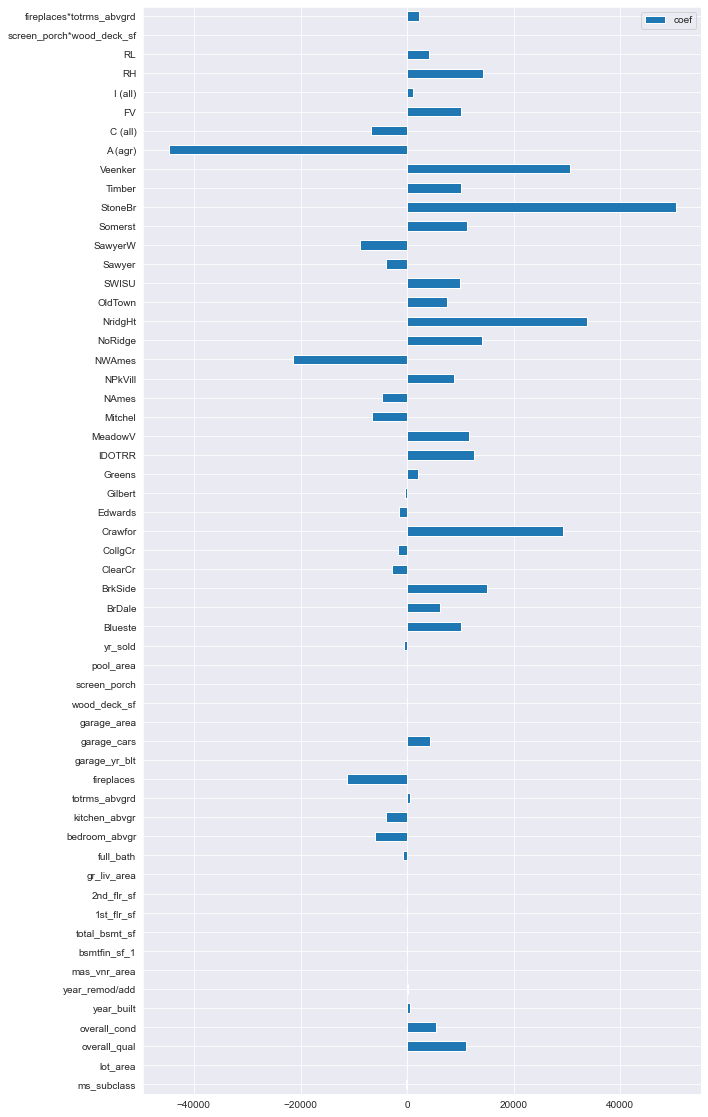

In [97]:
#make a bar chart to visualize coeff
coef_df.plot(kind= 'barh', figsize = (10, 20));

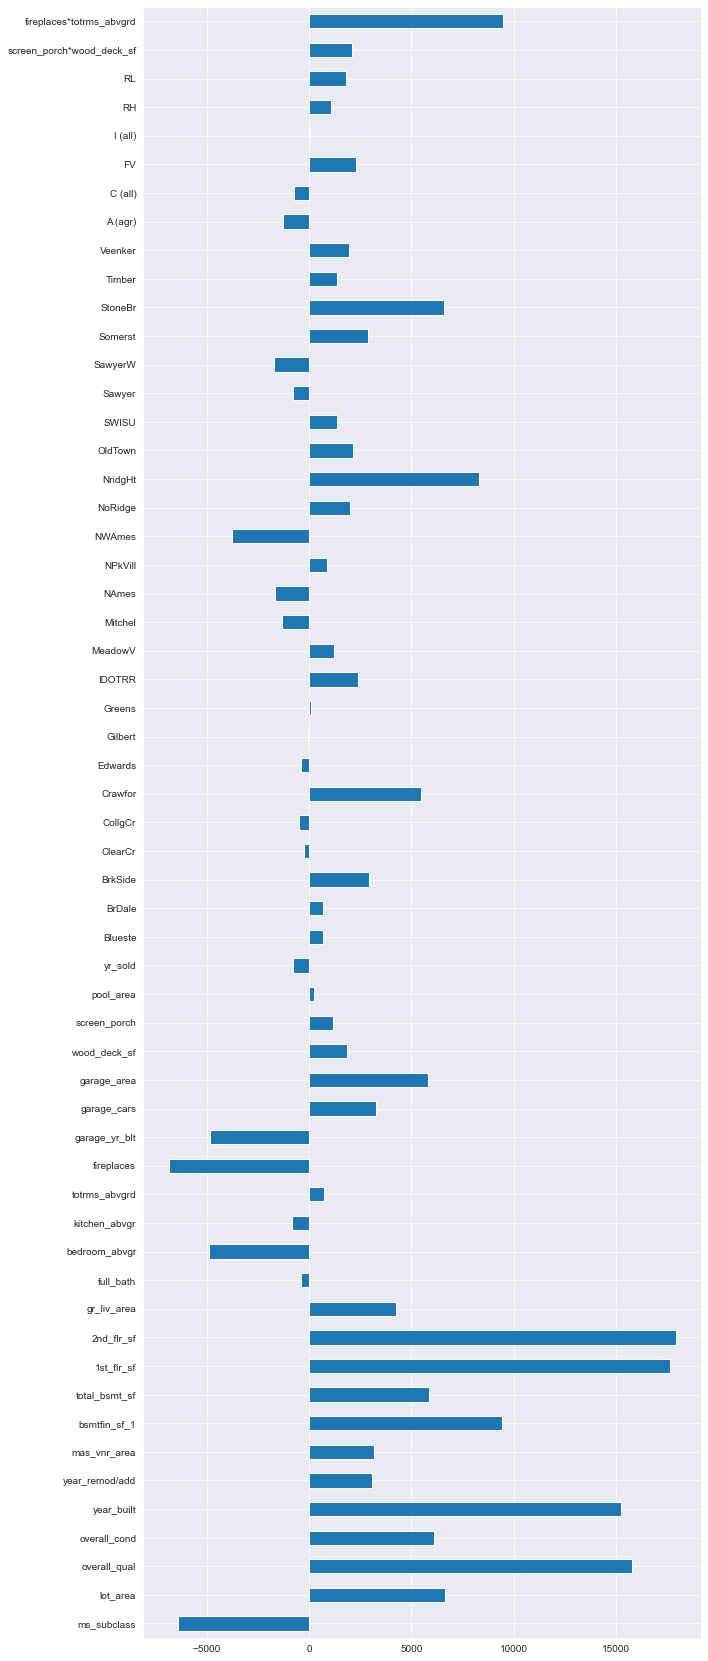

In [98]:
# lets normalize coeff to get a better sense of feature importance
#this is an approx what my coef would look like before I do LR
coef_df['normalized_coef'] = coef_df['coef'] * X_train.std() #means of norm coef... very similar to scale the feature before doing LR

coef_df['normalized_coef'].plot(kind = 'barh', figsize=(10,30));
#this plot tells us a better job of telling umportantce

#trying scalling my data before doing LR and compare the plots of between that and LR
#standardscalar() on my data!!.. then do  linear reg on your standard_data  (transform my data Z_train z_test and use that to train my model)  look at the feature engineering lesson!


#when you run lasso ridge you are required to do scale your data 

In [99]:
#------------------------ Compare coef scores: non scaled vs scaled!.. Also when normalized--------------------------

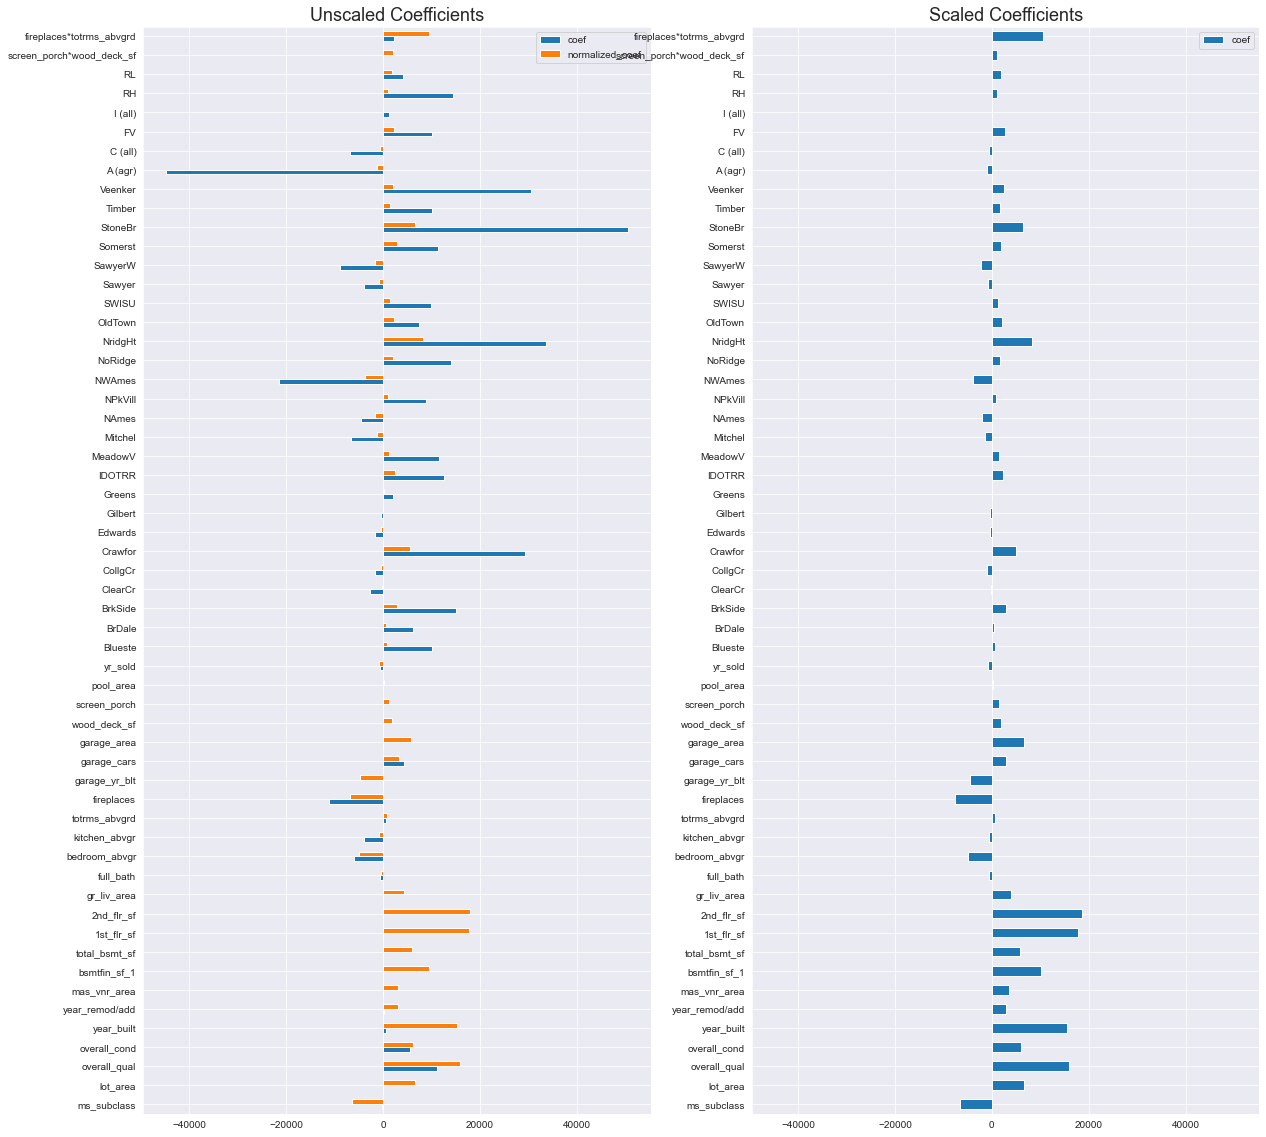

In [100]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize=(15,10))

ax1 = plt.subplot(axes[0])  #since this subplot is 1-dimensional (basiclaly an array) i dont have to say like axes[0,0]
ax2 = plt.subplot(axes[1])                                                                               #  or  axes[0,1] 


#------Column1  Unscaled Coef-------
coef_df.plot(kind= 'barh', figsize = (20, 20), ax = ax1)  #setting the parameter 'ax' to whatever my index is in my sublot above is how i plot it into my subplot!
ax1.set_title('Unscaled Coefficients', size = 18)

#-----ccolumn2 Scaled Coef---------
coef_df2.plot(kind= 'barh', figsize = (20,20), ax = ax2)
ax2.set_title('Scaled Coefficients', size = 18);




#note: IDK HOW I MADE A GRAPH APPEAR ONTOP OF A GRAPH but i want to know how


**The unscaled Coef. are looking exactly the same as scaled Coef. when they are normalized!**

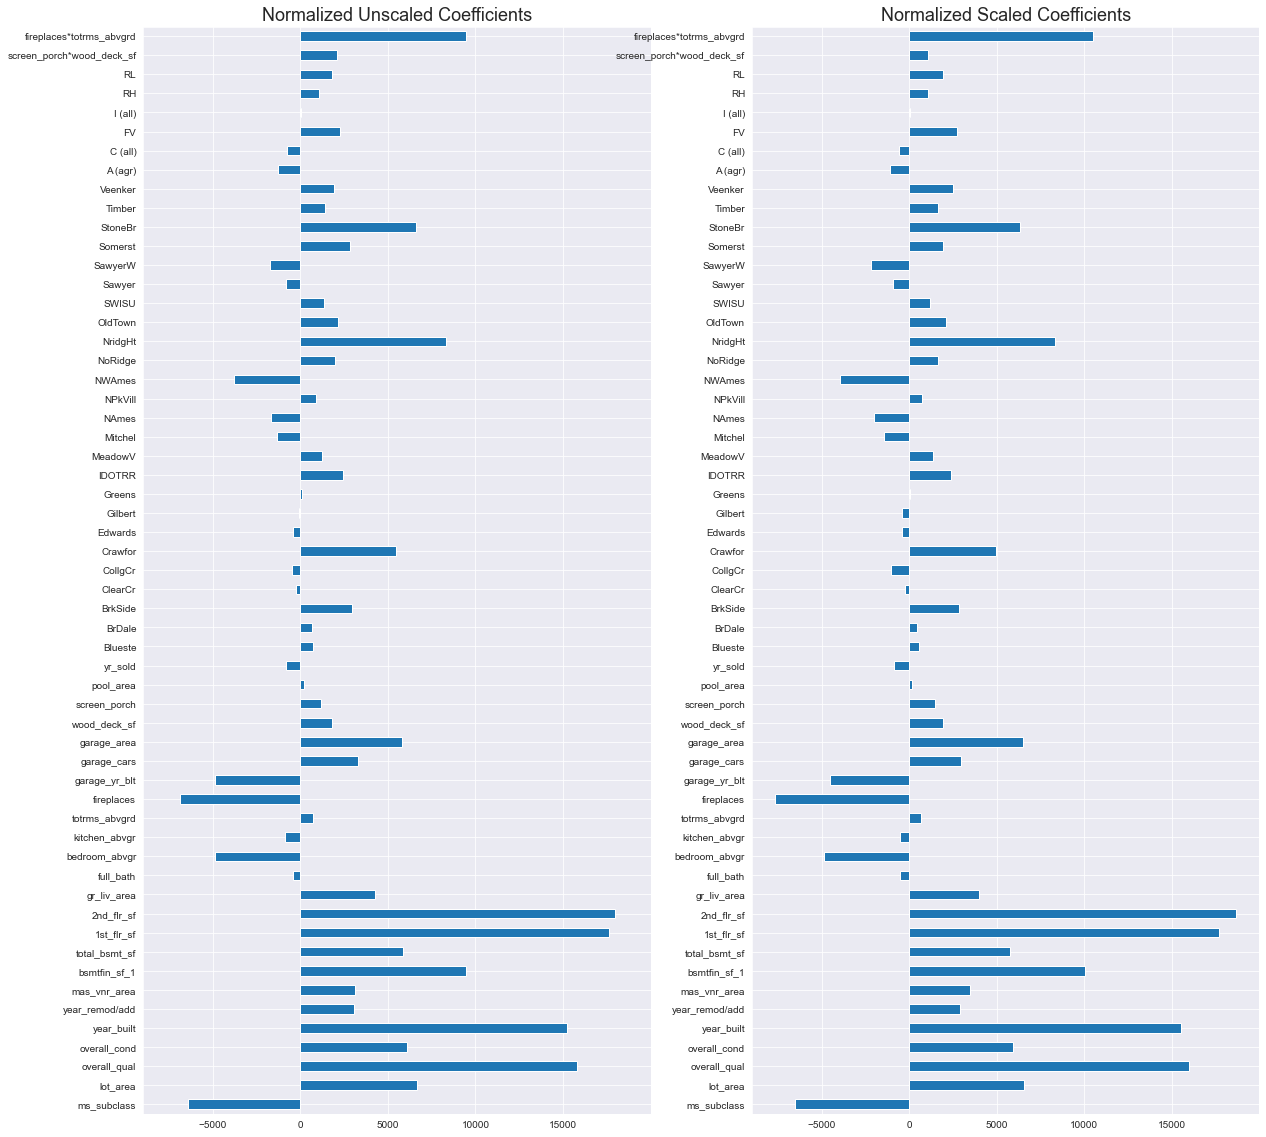

In [101]:
#--------------- Now compare the normalized coeffecients!!-------------------------
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize=(25,10))

ax1 = plt.subplot(axes[0])  #since this subplot is 1-dimensional (basiclaly an array) i dont have to say like axes[0,0]
ax2 = plt.subplot(axes[1])                                                                               #  or  axes[0,1] 


#------Column1  Unscaled Coef-------

coef_df['normalized_coef'] = coef_df['coef'] * X_train.std() #means of norm coef... very similar to scale the feature before doing LR

coef_df['normalized_coef'].plot(kind = 'barh', figsize=(20,20), ax = ax1 );

# coef_df.plot(kind= 'barh', figsize = (20, 20), ax = ax1)  #setting the parameter 'ax' to whatever my index is in my sublot above is how i plot it into my subplot!
ax1.set_title('Normalized Unscaled Coefficients', size = 18)

#-----ccolumn2 Scaled Coef---------

coef_df2['normalized_coef'] = coef_df2['coef'] * X_train2.std() #means of norm coef... very similar to scale the feature before doing LR

coef_df2['normalized_coef'].plot(kind = 'barh', figsize=(20,20), ax = ax2);

# coef_df2.plot(kind= 'barh', figsize = (20,20), ax = ax2)
ax2.set_title('Normalized Scaled Coefficients', size = 18);


**The top 5 features bringing the highest value to my SalePrice of a house are overall_qual, year_built, bsmtfin_sf_1, 2nd_flr_sf, and 1st_flr_sf.**

For every unit increase in 1 standard deviation overrall_quality, the SalePrice increases by 17,000

Now with the addition of my interaction terms, it turns out the interaction term fireplaces*totrms_abvgrd (slightly above bsmtfin_sf_1) brings one of the highest value to a Saleprice of a house!

**The top 3 neigborhoods bringing the highest value to my SalePrice of a house are NridgHt, StoneBr, Crawfor**

For every one increase in 1 standard deviation in NridgHt, the SalePrice increases by about 6.4k.

**The top 2 ms_zoning bringing the highest value to my SalePrice of a house are RL(Residentail Low Density) and FV(Floating Village Residential)**

For every one increase in 1 standard deviation in RL, the SalePrice increases by about 2.9k.

In [102]:
##********** WILL DO LASSO/RIDGE testing/modeling with these values/features! ********************##########
## ---------- Also use a few of the features coef here that are low and make interactiont terms out of em-----------#####
## -------------------------  screen_porch * wood_deck_sf         and    fireplaces * totrms_abvgrd -------------------
### back up we go to process them--------------------------------------------------------

In [103]:
coef_df2['ms_subclass':'Blueste']

,coef,normalized_coef
ms_subclass,-6533.703896,-6531.009341
lot_area,6553.963553,6551.260643
overall_qual,15967.461617,15960.876501
overall_cond,5927.047320,5924.602955
year_built,15551.542075,15545.128488
year_remod/add,2892.870699,2891.677655
mas_vnr_area,3463.503382,3462.075003
bsmtfin_sf_1,10033.960362,10029.822272
total_bsmt_sf,5788.925675,5786.538273
1st_flr_sf,17712.478709,17705.173933


In [104]:
coef_df2['Blueste':]

,coef,normalized_coef
Blueste,572.588886,572.352745
BrDale,439.909791,439.728369
BrkSide,2863.833603,2862.652534
ClearCr,-260.575104,-260.467641
CollgCr,-1060.679074,-1060.241641
Crawfor,4985.834794,4983.778593
Edwards,-379.054959,-378.898633
Gilbert,-408.521627,-408.353149
Greens,44.934148,44.915617
IDOTRR,2390.671736,2389.685803


In [105]:
X.columns

Index(['ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'full_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'screen_porch',
       'pool_area', 'yr_sold', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber', 'Veenker', 'A (agr)', 'C (all)', 'FV', 'I (all)',
       'RH', 'RL', 'screen_porch*wood_deck_sf', 'fireplaces*totrms_abvgrd'],
      dtype='object')

In [106]:
coef_df2['coef'][27:58]   #> 4000

ClearCr                       -260.575104
CollgCr                      -1060.679074
Crawfor                       4985.834794
Edwards                       -379.054959
Gilbert                       -408.521627
Greens                          44.934148
IDOTRR                        2390.671736
MeadowV                       1386.946218
Mitchel                      -1457.101421
NAmes                        -2019.738691
NPkVill                        758.600061
NWAmes                       -3917.430673
NoRidge                       1656.216157
NridgHt                       8308.643651
OldTown                       2128.792853
SWISU                         1211.768115
Sawyer                        -897.969501
SawyerW                      -2195.512841
Somerst                       1946.226700
StoneBr                       6363.458077
Timber                        1668.841763
Veenker                       2501.468587
A (agr)                      -1089.144470
C (all)                       -555

In [136]:
# plt.figure(figsize=(20,5))
# sns.boxplot(x = train_df_final['2nd_flr_sf'])   #quite a lot of outliers after 320,000 ... lets remove em 
#plt.title('', size = 18)

Text(0.5, 1.0, 'SalePrice vs 2nd Floor sf')

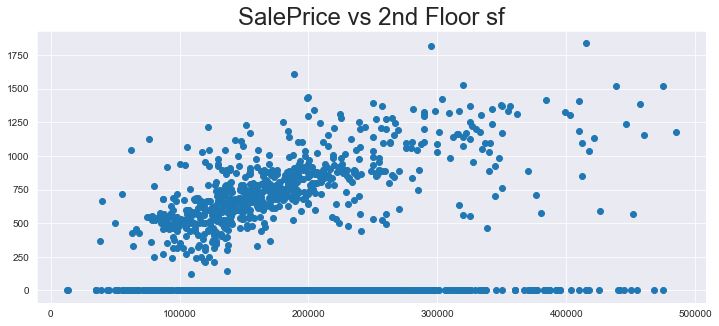

In [108]:
plt.figure(figsize=(12,5))
plt.scatter(train_df['saleprice'], train_df['2nd_flr_sf'])
plt.title('SalePrice vs 2nd Floor sf', size = 24)

Text(0.5, 1.0, 'SalePrice vs Fireplaces')

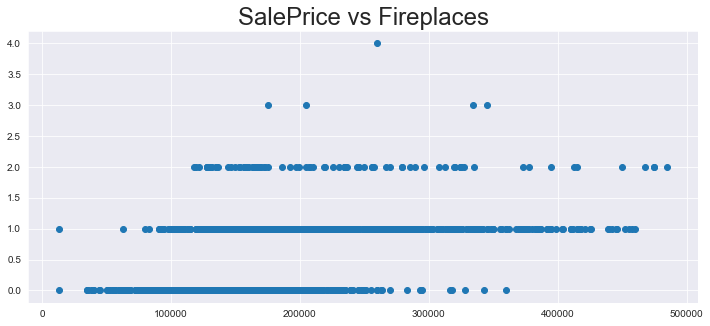

In [109]:
plt.figure(figsize=(12,5))
plt.scatter(train_df['saleprice'], train_df['fireplaces'])
plt.title('SalePrice vs Fireplaces', size = 24)

In [110]:
X.columns

Index(['ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'full_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'screen_porch',
       'pool_area', 'yr_sold', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber', 'Veenker', 'A (agr)', 'C (all)', 'FV', 'I (all)',
       'RH', 'RL', 'screen_porch*wood_deck_sf', 'fireplaces*totrms_abvgrd'],
      dtype='object')

## Part 3 Kaggle Submission: Use our model to make predictions on the test dataset

In [111]:
# also Lets log  transformation  our data to make it more evenly distributed 

In [112]:
#first we subset test_df_final to just the features we included in our model
X_kaggle = test_df_final.loc[:, features_2]

# Then we use the same model to predict on the test data and save predictions to a 'SalePrice' column

X_kaggle['SalePrice'] = lr.predict(X_kaggle)
X_kaggle.head()

,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,...,Veenker,A (agr),C (all),FV,I (all),RH,RL,screen_porch*wood_deck_sf,fireplaces*totrms_abvgrd,SalePrice
id,,,,,,,,,,,,,,,,,,,,,
2658,190,9142,6,8,1910,1950,0.0,0,1020,908,...,0,0,0,0,0,0,0,0,0,129537.095217
2718,90,9662,5,4,1977,1977,0.0,0,1967,1967,...,0,0,0,0,0,0,1,0,0,160501.579758
2414,60,17104,7,5,2006,2006,0.0,554,654,664,...,0,0,0,0,0,0,1,0,7,209280.816653
1989,30,8520,5,6,1923,2006,0.0,0,968,968,...,0,0,0,0,0,0,0,0,0,111980.807741
625,20,9500,6,5,1963,1963,247.0,609,1394,1394,...,0,0,0,0,0,0,1,0,12,176543.501427


In [113]:
#Set output to be a dataframe with only the 'SalePrice' column
output = X_kaggle[['SalePrice']]

In [114]:
#Save output to a csv
output.to_csv('../datasets/submission_1.csv')

In [115]:
pd.read_csv('../datasets/submission_1.csv')

,id,SalePrice
0,2658,129537.095217
1,2718,160501.579758
2,2414,209280.816653
3,1989,111980.807741
4,625,176543.501427
...,...,...
873,1662,178750.193541
874,1234,221596.631798
875,1373,119890.881758
876,1672,114512.814494


#### Refit Model on Entire Training Dataset to Generate Predictions

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
#Instantiate new model and evaluate using cross_val_score
lr= LinearRegression()
cross_val_score(lr, X, y)

array([0.90514539, 0.90948822, 0.90304987, 0.90844079, 0.90380255])

In [118]:
# might want to get scores in RMSE to directly compare to previous results.
# to do this, we will need to set  scoring = 'neg_root_mean_squared_error'

#however, since RMSE is a loss ftn (where low scores are better), unlike R2 which is a 
#score ftn, we will need to multiply the results by -1 to get the real RMSE scores

In [119]:
#evaluate cross_val_score with 'neg_root_mean_squared '
cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error') *-1
#the reason we use neg is to turn it ihnto a score ftn
# coverting RMSE into R2

array([22863.79955007, 22952.170916  , 23913.05813113, 22409.76228905,
       23506.79451226])

In [120]:
# then we cna fit the model to the whole training dataset
#.. and then go through the same process of generating predictions (the same part in 'use your model to make predictions on the test dataset')
lr.fit(X, y)

LinearRegression()

In [121]:
X_kaggle = test_df_final.loc[:, features_2 ]

X_kaggle['SalePrice'] = lr.predict(X_kaggle)

In [122]:
output = X_kaggle[['SalePrice']]
output.head()

,SalePrice
id,
2658,131160.094396
2718,153818.408272
2414,210818.222947
1989,110456.222440
625,180115.407733


In [123]:
output.to_csv('../datasets/submission_2.csv')

In [124]:
features;

#### Log Transformation!

In [125]:
lr = LinearRegression()
lr.fit(X_train, np.log(y_train))

LinearRegression()

In [126]:
np.log(lr.predict(X_train))
#need to to put this in exp bec your y_train is in log so convert it to better numbers using exp 

array([2.53372178, 2.48211648, 2.50003719, ..., 2.48069642, 2.50845651,
       2.42583458])

In [127]:
#Evaluate model on both training and testing data using RMSE
mean_squared_error(y_test, np.exp(lr.predict(X_test)))**0.5

19519.70836081461

In [128]:
mean_squared_error(y_train, np.exp(lr.predict(X_train)))**0.5

18538.94280623549

In [129]:
features_2

['ms_subclass',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'full_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'wood_deck_sf',
 'screen_porch',
 'pool_area',
 'yr_sold',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'A (agr)',
 'C (all)',
 'FV',
 'I (all)',
 'RH',
 'RL',
 'screen_porch*wood_deck_sf',
 'fireplaces*totrms_abvgrd']

In [130]:
test_df_final.loc[test_df_final['pool_area'] != 0, ['pool_area']]

,pool_area
id,
1064,144
1761,555
2571,512
2090,444


In [131]:
test_df_final.columns

Index(['pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'street', 'alley',
       'lot_shape', 'land_contour', 'utilities', 'lot_config',
       ...
       'Timber', 'Veenker', 'A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL',
       'screen_porch*wood_deck_sf', 'fireplaces*totrms_abvgrd'],
      dtype='object', length=110)

In [132]:
X_kaggle = test_df_final.loc[:, features_2]
X_kaggle['SalePrice'] = np.exp(lr.predict(X_kaggle))

In [133]:
output = X_kaggle[['SalePrice']]
output.head()

,SalePrice
id,
2658,140528.980563
2718,165087.954065
2414,209126.891290
1989,103375.859342
625,168038.683508


In [134]:
output.to_csv('../datasets/submissions_4.csv')  #this one gives a score of 17.8k
#for submission_3 file (including all the non-objectt ype columns and dummifying neighborhood)oh holy shiett... my score improved incredibly  from 29k down to 16k
                                                    # this score was where i included all the columns that were already non-object type
                                                    #and neighborhood column dummified!

<AxesSubplot:ylabel='Frequency'>

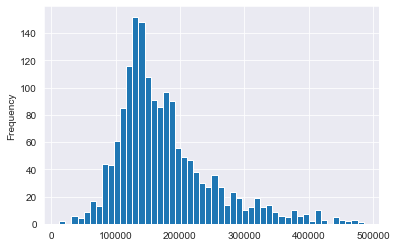

In [135]:
train_df_final['saleprice'].plot(kind = 'hist', bins = 50)

In [62]:
#Not quite normally distributed. Try logging it! (np.log)

<AxesSubplot:ylabel='Frequency'>

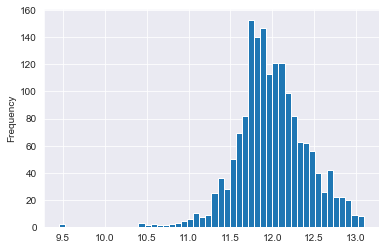

In [153]:
np.log(train_df_final['saleprice']).plot(kind = 'hist', bins = 50)

<AxesSubplot:ylabel='Frequency'>

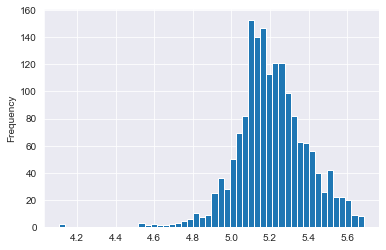

In [154]:
np.log10(train_df_final['saleprice']).plot(kind = 'hist', bins = 50)